<a href="https://colab.research.google.com/github/ekateee/Laba1/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Лабораторная работа 1. </h1>
<em>Классификация изображения по 3 классам: Кошка, Собака и Панда</em>


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Display soma data

Имеются три класса:

1. Кошки *(997 изображений)*
2. Собаки *(997 изображений)*
3. Панды *(997 изображений)*

*Изображения могут быть картинками или фотографией. Примеры изображений*

Count of Cat=  997



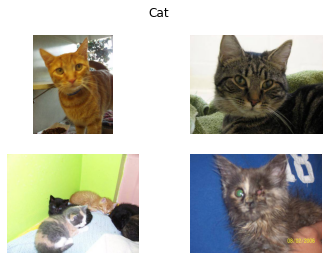

Count of Dog=  997



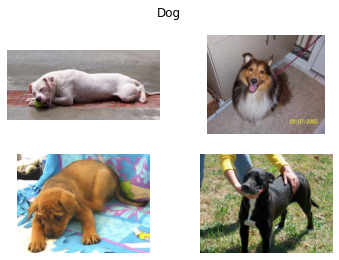

Count of Panda=  997



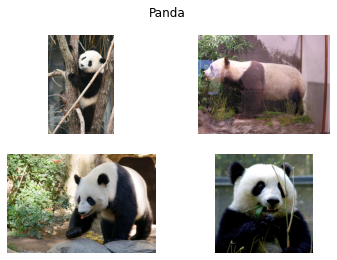

In [ ]:
path = '/content/drive/My Drive/CV/Animal/'
categories = ['Cat','Dog','Panda']

for name in categories:
  print('Count of ' + name + '= ', len(os.listdir(path+name)))
  print()
  fig, _ = plt.subplots(2,2)
  
  fig.suptitle(name)
  for key, value in enumerate(os.listdir(path + name)[:4]):
        img = plt.imread(path + name+'/'+value)
        plt.subplot(2, 2, key+1)
        plt.axis('off')
        plt.savefig(name, format='png')
        plt.imshow(img)
  plt.show()




### Pictures shape

*Изображения имеют разные размеры,поэтому в следующем пункте преобразуем в один формат*

In [ ]:
shape_rows = []
shape_columns = []
shape_canals =[]

for name in categories:
    for file in os.listdir(path + name):
        shape_rows.append(plt.imread(path + name +'/'+ file).shape[0])
        shape_columns.append(plt.imread(path + name +'/'+ file).shape[1])
     
    print(name, ' is height min =  ', min(shape_rows), ' and width min : ', min(shape_rows))
    print(name, ' is height max = ', max(shape_columns), ' and width max = ', max(shape_columns))
    
    print()
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  

Cat  is height min =   69  and width min :  69
Cat  is height max =  500  and width max =  500

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dog  is height min =   50  and width min :  50
Dog  is height max =  500  and width max =  500

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Panda  is height min =   50  and width min :  50
Panda  is height max =  1600  and width max =  1600

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### Preprocess data and label inputs



In [ ]:
x=[]
y_labels=[]

for category in categories:
  path_category = path + category 
  for name_file in os.listdir(path_category):
    full_path = path_category+'/' + name_file
    image = load_img(full_path, target_size=(300,300))
    image = img_to_array(image)
    x.append(image)
    y_labels.append(category)

x = asarray(x)
y_labels = asarray(y_labels)


### Label Encoding

In [ ]:
label = LabelEncoder()
y = label.fit_transform(y_labels)
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
y_labels = to_categorical(y)
y_labels.shape

(2991, 3)

In [ ]:
np.unique(y_labels)

array([0., 1.], dtype=float32)

### Split dataset into train and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_labels, test_size = 0.33 , random_state = 42, shuffle = True)

In [ ]:
x_train = x_train/255
x_test=x_test/255

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2003, 300, 300, 3)
(988, 300, 300, 3)
(2003, 3)
(988, 3)


### Implement Machine Learning

In [ ]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras import Model
from keras.applications.vgg16 import VGG16

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
def define_model():
# load model
  model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
# add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
 
  output = Dense(3, activation="softmax")(class1)
# define new model
  model = Model(inputs=model.inputs, outputs=output)
# compile model
  opt = Adam(lr=0.01)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
model_2=define_model()

In [ ]:
model_2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)      

In [ ]:
model_2.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=3, batch_size=32,verbose=1)

Epoch 1/3
63/63 [==============================] - 27s 432ms/step - loss: 8.3525 - accuracy: 0.6720 - val_loss: 0.4222 - val_accuracy: 0.8563
Epoch 2/3
63/63 [==============================] - 23s 361ms/step - loss: 0.1423 - accuracy: 0.9506 - val_loss: 0.3959 - val_accuracy: 0.8583
Epoch 3/3
63/63 [==============================] - 22s 356ms/step - loss: 0.0609 - accuracy: 0.9820 - val_loss: 0.3253 - val_accuracy: 0.8947


In [ ]:
time_VGG16 = 432
print("Running max time of one step in the model = ", time_VGG16, "s")

Running max time of one step in the model =  432 s


### Ower Model

In [ ]:
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
model_ower = Sequential()

model_ower.add(Convolution2D(300, (2, 2), activation='relu', input_shape=(300,300,3 )))
model_ower.add(MaxPooling2D(pool_size=(2, 2)))
model_ower.add(Convolution2D(300, (2, 2), activation='relu'))
model_ower.add(MaxPooling2D(pool_size=(2, 2)))
model_ower.add(Dropout(0.25))
model_ower.add(Flatten())
model_ower.add(Dense(128, activation='relu'))
model_ower.add(Dropout(0.5))
model_ower.add(Dense(3, activation='softmax'))


model_ower.compile( optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])

print(model_ower.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 299, 299, 300)     3900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 300)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 300)     360300    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 300)       0         
_________________________________________________________________
flatten (Flatten)            (None, 1642800)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [ ]:
!fallocate -l 10G swap
!mkswap swap
!chmod 600 swap
!swapon swap

mkswap: swap: insecure permissions 0644, 0600 suggested.
Setting up swapspace version 1, size = 10 GiB (10737414144 bytes)
no label, UUID=bff53c59-7fea-4826-b148-300f0f34bf57
swapon: /content/swap: swapon failed: Operation not permitted


In [ ]:
model_ower.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=14, batch_size=32,verbose=1)

Epoch 1/14
63/63 [==============================] - 50s 795ms/step - loss: 0.0680 - accuracy: 0.9825 - val_loss: 1.4517 - val_accuracy: 0.6751
Epoch 2/14
63/63 [==============================] - 52s 821ms/step - loss: 0.0671 - accuracy: 0.9825 - val_loss: 1.7781 - val_accuracy: 0.6700
Epoch 3/14
63/63 [==============================] - 53s 846ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 1.8049 - val_accuracy: 0.6862
Epoch 4/14
63/63 [==============================] - 55s 868ms/step - loss: 0.0628 - accuracy: 0.9820 - val_loss: 1.8099 - val_accuracy: 0.6751
Epoch 5/14
63/63 [==============================] - 55s 875ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 2.2230 - val_accuracy: 0.6771
Epoch 6/14
63/63 [==============================] - 55s 872ms/step - loss: 0.0289 - accuracy: 0.9940 - val_loss: 1.9439 - val_accuracy: 0.6711
Epoch 7/14
63/63 [==============================] - 55s 873ms/step - loss: 0.0325 - accuracy: 0.9920 - val_loss: 2.0312 - val_accuracy: 0.6630

In [ ]:
time_ower_model = 55
print("Running max time of one step in the model = ", time_ower_model, "s")

Running max time of one step in the model =  55 s


### Predictions

In [ ]:
prediction = model_2.predict(x_test)
for i in range(3):
  print(prediction[i*100])
  print("prediction number of class  - ", np.argmax(prediction[i*100]))
  print()
  print("true number of class - ", np.argmax(y_test[i*100]))
  print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
  print()

[3.9554345e-03 9.9577135e-01 2.7324900e-04]
prediction number of class  -  1

true number of class -  1
+++++++++++++++++++++++++++++++++++++++++++++++++++

[1.0615023e-07 2.9906480e-02 9.7009337e-01]
prediction number of class  -  2

true number of class -  2
+++++++++++++++++++++++++++++++++++++++++++++++++++

[0.9851736  0.01194601 0.00288043]
prediction number of class  -  0

true number of class -  0
+++++++++++++++++++++++++++++++++++++++++++++++++++



In [ ]:
prediction = model_ower.predict(x_test)
for i in range(3):
  print(prediction[i*100])
  print("prediction number of class  - ", np.argmax(prediction[i*100]))
  print()
  print("true number of class - ", np.argmax(y_test[i*100]))
  print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
  print()

[0.341203   0.60610306 0.05269391]
prediction number of class  -  1

true number of class -  1
+++++++++++++++++++++++++++++++++++++++++++++++++++

[5.9991272e-08 2.0022529e-07 9.9999976e-01]
prediction number of class  -  2

true number of class -  2
+++++++++++++++++++++++++++++++++++++++++++++++++++

[9.668666e-01 3.313320e-02 2.772775e-07]
prediction number of class  -  0

true number of class -  0
+++++++++++++++++++++++++++++++++++++++++++++++++++



### Conclusion

1. Готовая архитектура(*VGG16*) работает дольше на одном шаге (*432 s*), чем собственная (*55 s*).

2. Для готовой использовалось 3 эпохи, нереобучение не случилось: loss функция уменьшается, а acc  увеличивается с каждой новой эпохи и на *train* и на *val* данных. Лучшие результаты на 3 эпохе:
  1. loss = 0.0609
  2. acc = 0.9820
  3. Val  data = 0.3253 ; 0.8947

  Прекрасные результаты.
3. Для собственной использовалось 14 эпох, переобучение случилось: в *train* точность растет, а в *val*  - играет: скачкообразно уменьшается, то возрастает,но в пределах 63 до 68 %. Это плохо. 
4. Функция потерь для *train* почти достигает нуля(0.0172), а вот с *val* все плохо - большая ошибка(2.4868)
  
4. batch_size в обеих моделях одинаковые  = 32 изображения на одной проверке.

5. Обе модели справились с тестовым предсказием и выбрали верные ответы. Но готовая архитектура работает лучше, чем собственная, это наглядно показывает пукнт 2 - 4.
